In [2]:
import matplotlib.pylab as plt
import seaborn as sns
sns.despine

<function seaborn.utils.despine>

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.layers import Merge, LeakyReLU
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger, EarlyStopping
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.layers.advanced_activations import *
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D
from keras.layers.recurrent import LSTM, GRU
from keras import regularizers

In [6]:
from preprocessing import shuffle_in_unison, create_Xt_Yt

[NbConvertApp] Converting notebook 001_Preprocessing.ipynb to python
[NbConvertApp] Writing 3251 bytes to 001_Preprocessing.py


In [7]:
import pandas as pd

data = pd.read_csv("../datasets/snp/table.csv")[::-1]
data.head()

,Date,Open,High,Low,Close,Volume,Adj Close
16704,1950-01-03,16.66,16.66,16.66,16.66,1260000,16.66
16703,1950-01-04,16.85,16.85,16.85,16.85,1890000,16.85
16702,1950-01-05,16.93,16.93,16.93,16.93,2550000,16.93
16701,1950-01-06,16.98,16.98,16.98,16.98,2010000,16.98
16700,1950-01-09,17.08,17.08,17.08,17.08,2520000,17.08


/anaconda3/envs/dlcv/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


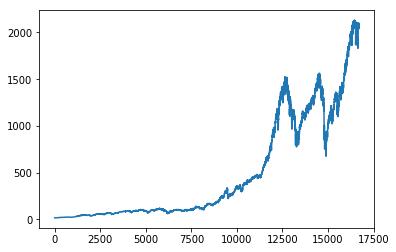

In [8]:
data = data.ix[:, 'Adj Close'].tolist()
plt.plot(data)
plt.show()

In [9]:
WINDOW = 30
EMB_SIZE = 1
STEP = 1
FORECAST = 5

In [10]:
# Create time window
X, Y = [], []
for i in range(0, len(data), STEP):
    try:
        x_i = data[i:i + WINDOW]
        y_i = data[i + WINDOW + FORECAST]

        last_close = x_i[WINDOW - 1]
        next_close = y_i

        if last_close < next_close:
            y_i = [1, 0]
        else:
            y_i = [0, 1]
    except Exception as e:
        print(e)
        break
        
    X.append(x_i)
    Y.append(y_i)

list index out of range


In [12]:
print(len(X))
print(len(X))

16670
16670


In [14]:
import numpy as np
X = [(np.array(x) - np.mean(x)) / np.std(x) for x in X]
X, Y = np.array(X), np.array(Y)

X_train, X_test, Y_train, Y_test = create_Xt_Yt(X, Y)

In [16]:
model = Sequential()
model.add(Dense(64, input_dim=30, activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Dropout(0.5))
model.add(Dense(16, activity_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(LeakyReLU())

model.add(Dense(2))
model.add(Activation('softmax'))

opt = Nadam(lr=0.001)

reduce_lr = ReduceLROnPlateau(monitor='val_acc', factor=0.9, patience=25, min_lr=0.000001, verbose=1)
checkpointer = ModelCheckpoint(filePath='output/test.hdf5', verbose=1, save_best_only=True)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

AttributeError: module 'tensorflow.python.ops.nn' has no attribute 'leaky_relu'